# Fitting gammapy spectra with sherpa

Once we have exported the spectral files (PHA, ARF, RMF and BKG) in the OGIP format, it becomes possible to fit them later with gammapy or with any existing OGIP compliant tool such as XSpec or sherpa.

We show here how to do so with sherpa using the high-level user interface. For a general view on how to use stand-alone sherpa, see this [tutorial](http://nbviewer.jupyter.org/github/sherpa/sherpa/blob/master/docs/SherpaQuickStart.ipynb)

Tu run this notebook, one should first run spectrum_analysis to extract the relevant OGIP files.

## Importing sherpa high level UI

### loading the data as a sherpa DataStack

We first need to import the user interface and load the data with [load_data](http://cxc.harvard.edu/sherpa/ahelp/load_data.html). One can load files one by one, or more simply load them all at once through a [DataStack](http://cxc.harvard.edu/sherpa/ahelp/datastack.html).

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import glob   # to list files
from sherpa.astro.datastack import DataStack
import sherpa.astro.datastack as sh

In [6]:
ANALYSIS_DIR = 'crab_analysis'

ds = DataStack()
pha_list = glob.glob(ANALYSIS_DIR + '/ogip_data/pha_obs?????.fits')
for pha in pha_list:
    sh.load_data(ds,pha)

read ARF file crab_analysis/ogip_data/arf_obs23523.fits


INFO:sherpa.astro.io:read ARF file crab_analysis/ogip_data/arf_obs23523.fits


read RMF file crab_analysis/ogip_data/rmf_obs23523.fits


INFO:sherpa.astro.io:read RMF file crab_analysis/ogip_data/rmf_obs23523.fits


read background file crab_analysis/ogip_data/bkg_obs23523.fits


INFO:sherpa.astro.io:read background file crab_analysis/ogip_data/bkg_obs23523.fits


read ARF file crab_analysis/ogip_data/arf_obs23526.fits


INFO:sherpa.astro.io:read ARF file crab_analysis/ogip_data/arf_obs23526.fits


read RMF file crab_analysis/ogip_data/rmf_obs23526.fits


INFO:sherpa.astro.io:read RMF file crab_analysis/ogip_data/rmf_obs23526.fits


read background file crab_analysis/ogip_data/bkg_obs23526.fits


INFO:sherpa.astro.io:read background file crab_analysis/ogip_data/bkg_obs23526.fits


read ARF file crab_analysis/ogip_data/arf_obs23559.fits


INFO:sherpa.astro.io:read ARF file crab_analysis/ogip_data/arf_obs23559.fits


read RMF file crab_analysis/ogip_data/rmf_obs23559.fits


INFO:sherpa.astro.io:read RMF file crab_analysis/ogip_data/rmf_obs23559.fits


read background file crab_analysis/ogip_data/bkg_obs23559.fits


INFO:sherpa.astro.io:read background file crab_analysis/ogip_data/bkg_obs23559.fits


read ARF file crab_analysis/ogip_data/arf_obs23592.fits


INFO:sherpa.astro.io:read ARF file crab_analysis/ogip_data/arf_obs23592.fits


read RMF file crab_analysis/ogip_data/rmf_obs23592.fits


INFO:sherpa.astro.io:read RMF file crab_analysis/ogip_data/rmf_obs23592.fits


read background file crab_analysis/ogip_data/bkg_obs23592.fits


INFO:sherpa.astro.io:read background file crab_analysis/ogip_data/bkg_obs23592.fits


## Creating the source model

We can now use sherpa models. We need to remember that they were designed for X-ray astronomy and energy is written in keV. 

Here we start with a simple PL.

In [8]:
# Define the source model
sh.set_source("powlaw1d.p1")

# Change reference energy of the model 
p1.ref = 1e9   # 1 TeV = 1e9 keV
p1.gamma = 2.0
p1.ampl = 1e-20  # in cm**-2 s**-1 keV**-1
# View parameters 
print(p1)

powlaw1d.p1
   Param        Type          Value          Min          Max      Units
   -----        ----          -----          ---          ---      -----
   p1.gamma     thawed            2          -10           10           
   p1.ref       frozen        1e+09 -3.40282e+38  3.40282e+38           
   p1.ampl      thawed        1e-20            0  3.40282e+38           


## Perform the fit and compute errors

We need to set the correct statistic: [WSTAT](http://cxc.harvard.edu/sherpa/ahelp/wstat.html). We use functions [set_stat](http://cxc.harvard.edu/sherpa/ahelp/set_stat.html) to define the fit statistic, [notice](http://cxc.harvard.edu/sherpa/ahelp/notice.html) to set the energy range, and [fit](http://cxc.harvard.edu/sherpa/ahelp/fit.html)

In [10]:
### Define the statistic
sh.set_stat("wstat")

### Define the fit range
sh.notice(0.6e9,20e9)

### Do the fit
sh.fit()

Dataset               = 1
Method                = levmar
Statistic             = wstat
Initial fit statistic = 61.2483
Final fit statistic   = 29.7562 at function evaluation 195
Data points           = 28
Degrees of freedom    = 26
Probability [Q-value] = 0.277834
Reduced statistic     = 1.14447
Change in statistic   = 31.4921
   p1.gamma       2.16927     
   p1.ampl        1.81488e-20 


INFO:sherpa.astro.ui.utils:Dataset               = 1
Method                = levmar
Statistic             = wstat
Initial fit statistic = 61.2483
Final fit statistic   = 29.7562 at function evaluation 195
Data points           = 28
Degrees of freedom    = 26
Probability [Q-value] = 0.277834
Reduced statistic     = 1.14447
Change in statistic   = 31.4921
   p1.gamma       2.16927     
   p1.ampl        1.81488e-20 


## Plot the result

Note that sherpa does not provide flux points. It also only provides plot for each individual spectrum.

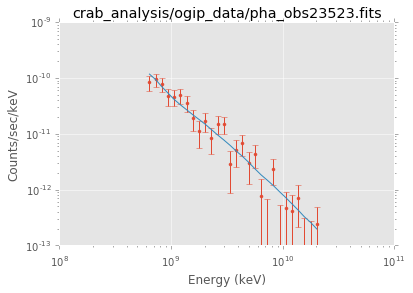

In [16]:
sh.plot_fit()
plt.gca().set_xscale("log")
plt.gca().set_yscale("log")

## Errors and confidence contours

We use [conf](http://cxc.harvard.edu/sherpa/ahelp/conf.html) and [reg_proj](http://cxc.harvard.edu/sherpa/ahelp/reg_proj.html) functions.

In [18]:
### Compute confidnce intervals
sh.conf()

Dataset               = 1
Confidence Method     = confidence
Iterative Fit Method  = None
Fitting Method        = levmar
Statistic             = wstat
confidence 1-sigma (68.2689%) bounds:
   Param            Best-Fit  Lower Bound  Upper Bound
   -----            --------  -----------  -----------
   p1.gamma          2.16927   -0.0982762     0.100776
   p1.ampl       1.81488e-20 -1.75401e-21  1.86717e-21
p1.ampl lower bound:	-1.75401e-21
p1.gamma lower bound:	-0.0982762
p1.ampl upper bound:	1.86717e-21
p1.gamma upper bound:	0.100776


INFO:sherpa.ui.utils:Dataset               = 1
Confidence Method     = confidence
Iterative Fit Method  = None
Fitting Method        = levmar
Statistic             = wstat
confidence 1-sigma (68.2689%) bounds:
   Param            Best-Fit  Lower Bound  Upper Bound
   -----            --------  -----------  -----------
   p1.gamma          2.16927   -0.0982762     0.100776
   p1.ampl       1.81488e-20 -1.75401e-21  1.86717e-21
INFO:sherpa:p1.ampl lower bound:	-1.75401e-21
INFO:sherpa:p1.gamma lower bound:	-0.0982762
INFO:sherpa:p1.ampl upper bound:	1.86717e-21
INFO:sherpa:p1.gamma upper bound:	0.100776


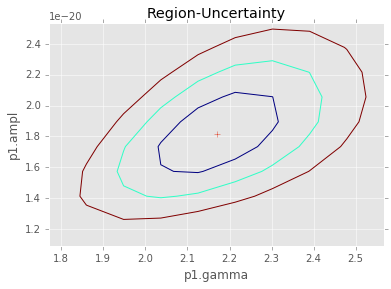

In [19]:
### Compute confidence contours for amplitude and index
sh.reg_unc(p1.gamma,p1.ampl)